# Imports

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV # import train test split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score,confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve, auc, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import metrics
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression, SGDClassifier  # import logistic regression model
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest, chi2

pd.set_option("display.max_columns" ,100)


# Import & Check Data

In [65]:
df_main = pd.read_csv("heart_2020_cleaned.csv")
df_main.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [66]:
df_main.shape

(319795, 18)

In [67]:
df_main.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [68]:
df_main.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [69]:
df_main.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [70]:
#check for nan values
df_main.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [71]:
# Check the Dtype of each column
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

# Data Preparation


In [72]:
# Duplicate and keep main copy as it is
df = df_main.copy(deep=True)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Create a new dataframe (heart_disease_df) from main dataframe with ONLY heartdisease

In [73]:
heart_disease_df = df[df.HeartDisease == 'Yes'].reset_index(drop=True)  #.drop('HeartDisease', axis = 1)
heart_disease_df.head(3)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
1,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
2,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes


In [74]:
heart_disease_df.shape

(27373, 18)

#### Create another dataframe with ONLY heartdiseases convert to 0 & 1

In [75]:
heart_disease_df['Diabetic'].nunique()


4

In [76]:
heart_disease_df.value_counts('Diabetic')

Diabetic
No                         17519
Yes                         8957
No, borderline diabetes      789
Yes (during pregnancy)       108
dtype: int64

In [77]:
# df_heartdiseases = df_converted.drop(df_converted[df_converted.HeartDisease == 0].index) . <-- Affendi! this is an alternate way to do the same thing

heart_disease_binary_df = heart_disease_df.replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1 })
heart_disease_binary_df.head(2)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,28.87,1,0,0,6.0,0.0,1,0,75-79,Black,0,0,Fair,12.0,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,60-64,White,1,0,Poor,15.0,1,0,0


### Create new dataframe from df and convert to binary for ML Learning portion

In [78]:
df_binary = df.copy(deep=True)
df_binary.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [79]:
# create mapper to replace values in df into age category & race into 1,2 etc
scale_mapper_age = {'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '75-79': 12, '65-69': 10, '70-74': 11, '80 or older': 13,}
# scale_mapper_race2 = {'White': 1, 'Black': 2, 'Hispanic': 3, 'Other': 4, 'American Indian/Alaskan Native': 5, 'Asian': 6}

# replace the values with the mapper above
df_binary = df.replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1 })
df_binary["AgeCategory"] = df["AgeCategory"].replace(scale_mapper_age)
# df_binary["Race"] = df_binary["Race"].replace(scale_mapper_race2)


#change race using getdummies
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

df_binary = encode_and_bind(df_binary, 'Race')

#remove Race column
df_binary = df_binary.drop('Race', axis=1)

df_binary.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,1,0,Fair,6.0,1,0,0,0,0,0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,0,1,Very good,5.0,1,0,0,0,0,0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,0,1,Good,6.0,0,0,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,0,0,Good,12.0,0,0,0,0,0,0,1,0,0
319794,0,46.56,0,0,0,0.0,0.0,0,0,13,0,1,Good,8.0,0,0,0,0,0,0,1,0,0


In [80]:
# Converting age category to ordinal category
scale_mapper = {'18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '75-79': 12, '65-69': 10, '70-74': 11, '80 or older': 13,}
heart_disease_binary_df["AgeCategory"] = heart_disease_binary_df["AgeCategory"].replace(scale_mapper)

heart_disease_binary_df = encode_and_bind(heart_disease_binary_df, 'Race')


heart_disease_binary_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,28.87,1,0,0,6.0,0.0,1,0,12,Black,0,0,Fair,12.0,0,0,0,0,0,1,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,9,White,1,0,Poor,15.0,1,0,0,0,0,0,0,0,1
2,1,32.98,1,0,1,10.0,0.0,1,1,12,White,1,1,Poor,4.0,0,0,1,0,0,0,0,0,1
3,1,25.06,0,0,0,0.0,0.0,1,0,13,White,1,0,Good,7.0,0,0,1,0,0,0,0,0,1
4,1,30.23,1,0,0,6.0,2.0,1,0,12,White,1,1,Fair,8.0,0,1,0,0,0,0,0,0,1


# EDA

### Question: Find the total number of people getting Heart Disease in the original data

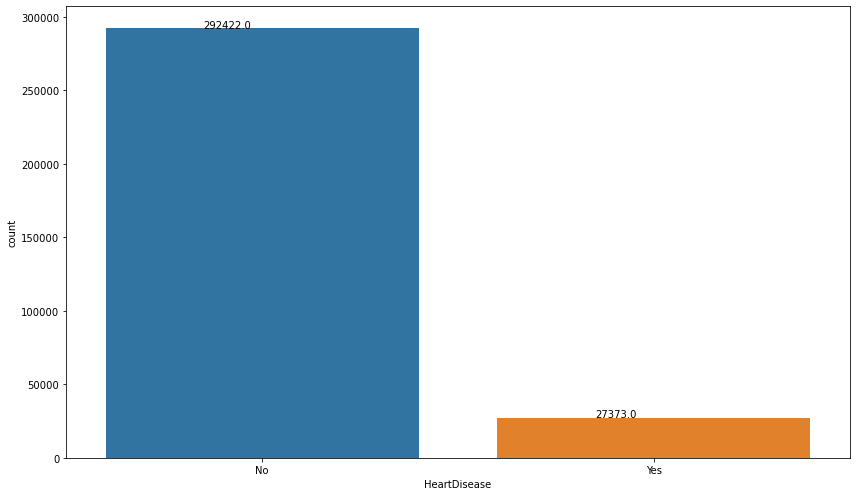

In [81]:
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="HeartDisease", data = df) #<-- Getting from main df master

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #<-- To add value on top of graph
plt.savefig ( "num_ppl_hd.svg" )
plt.show()


#### Conclusion: This determined that the nos of yes vs no of heart disease is significantly unbalanced

### Question: What is the highest Age Category that has Heart Dieseases

In [82]:
#check the num of unique age category (13)
heart_disease_binary_df['AgeCategory'].nunique()
heart_disease_binary_df.value_counts('AgeCategory')

AgeCategory
13    5449
11    4847
10    4101
12    4049
9     3327
8     2202
7     1383
6      744
5      486
4      296
3      226
2      133
1      130
dtype: int64

In [83]:
df.value_counts('AgeCategory')

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
dtype: int64

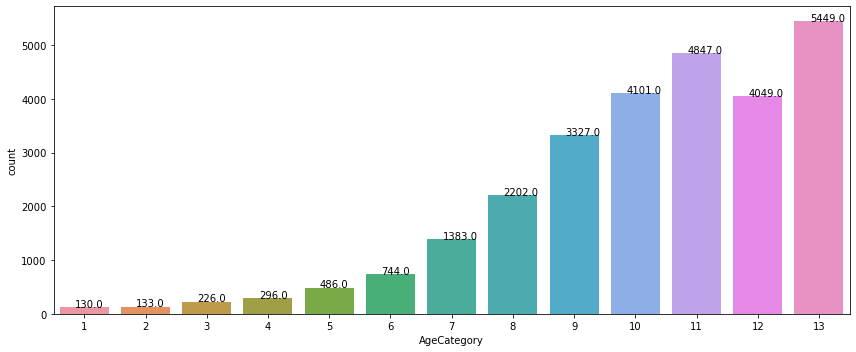

In [84]:
plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="AgeCategory", data = heart_disease_binary_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #<-- To add value on top of graph
plt.savefig ( "high_age_category_hd.svg" )
plt.show()

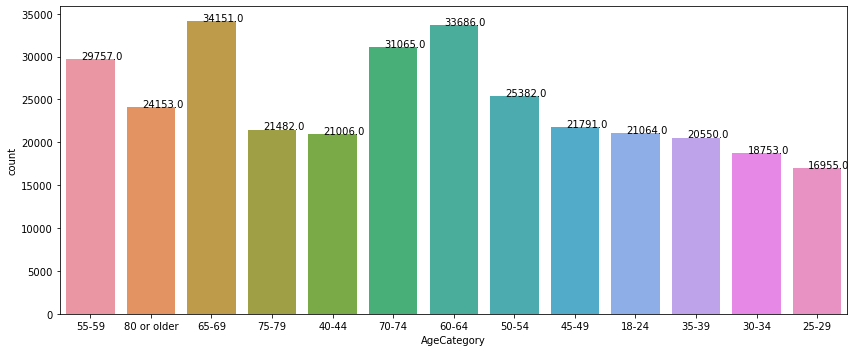

In [85]:
plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="AgeCategory", data = df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #<-- To add value on top of graph
plt.savefig ( "high_age_category_original_df.svg" )
plt.show()

#### Conclusion: For Age 35 onwards, chances between each age category increases by approximately 2 time

### Question: Man Vs Woman that has heart diseases

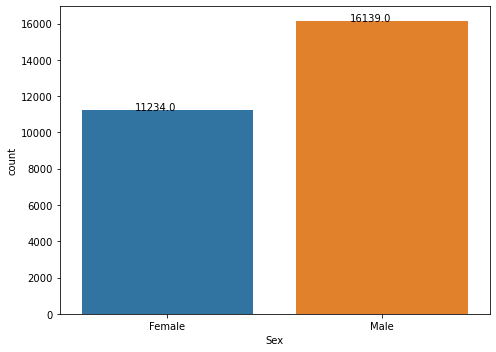

In [86]:
plt.rcParams["figure.figsize"] = [7.00, 5]
plt.rcParams["figure.autolayout"] = True

# df = pd.DataFrame(dict(col1=np.array([2, 4, 1, 1, 1, 4])))

ax = sns.countplot(x="Sex", data = heart_disease_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #<-- To add value on top of graph
plt.savefig ( "ratio_men_women_with_HD_df.svg" )
plt.show()






#### Conclusion: The number of male that suffers from HD is higher but the female is not far off

### Question: Which race has the heighest count of Heart Diseases?

In [87]:
heart_disease_binary_df.value_counts('Race')

Race
White                             22507
Black                              1729
Hispanic                           1443
Other                               886
American Indian/Alaskan Native      542
Asian                               266
dtype: int64

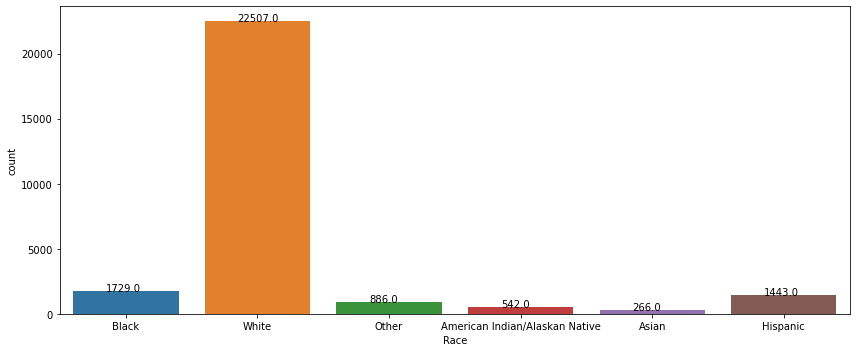

In [88]:
plt.rcParams["figure.figsize"] = [12.00, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="Race", data = heart_disease_binary_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) #<-- To add value on top of graph


plt.savefig ( "race_with_heartdisease.svg" )
plt.show()

#### Conclusion: The highest race that suffers from heart disease are the Whites

### Question: Is there a correlation between people that has Heart Diesease and their pre-existing illness?

In [89]:
hd_pre_illness_df = heart_disease_binary_df.loc[ :, ['Asthma','KidneyDisease', 'SkinCancer','Stroke','Diabetic']]


# removing the outlier of borderline & during pregnancy diabetes
hd_pre_illness_df.drop(hd_pre_illness_df[hd_pre_illness_df['Diabetic'] == 'No, borderline diabetes'].index, inplace = True)
hd_pre_illness_df.drop(hd_pre_illness_df[hd_pre_illness_df['Diabetic'] == 'Yes (during pregnancy)'].index, inplace = True)

# Check to see if the unique values drop from 4 to 2
hd_pre_illness_df.Diabetic.nunique()


2

In [90]:
print(hd_pre_illness_df.corr())

                 Asthma  KidneyDisease  SkinCancer    Stroke  Diabetic
Asthma         1.000000       0.060205   -0.020810  0.058812  0.062072
KidneyDisease  0.060205       1.000000    0.044890  0.072860  0.160771
SkinCancer    -0.020810       0.044890    1.000000  0.007873 -0.021168
Stroke         0.058812       0.072860    0.007873  1.000000  0.077115
Diabetic       0.062072       0.160771   -0.021168  0.077115  1.000000


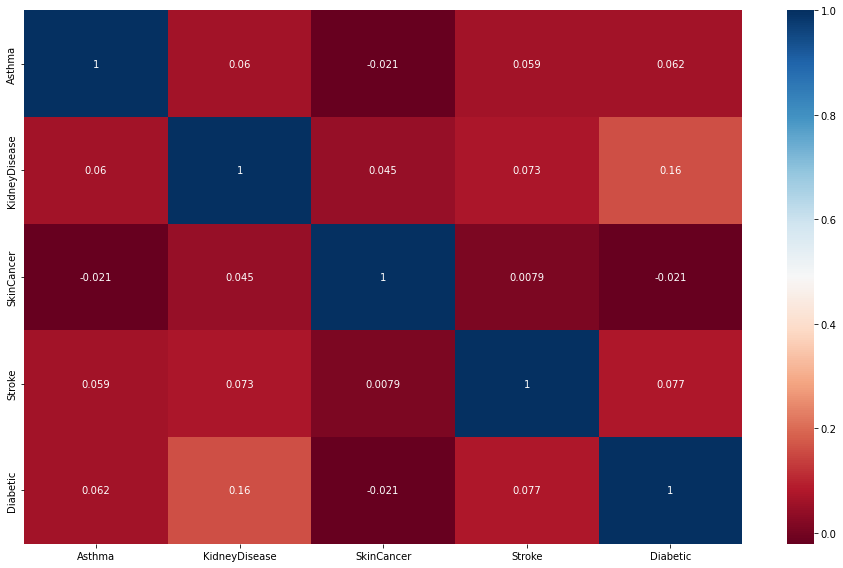

In [91]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(13,8))         

# sns.heatmap(hd_pre_illness_df)
dataplot = sns.heatmap(hd_pre_illness_df.corr(), cmap="RdBu", annot=True)
  
# displaying heatmap
plt.show()


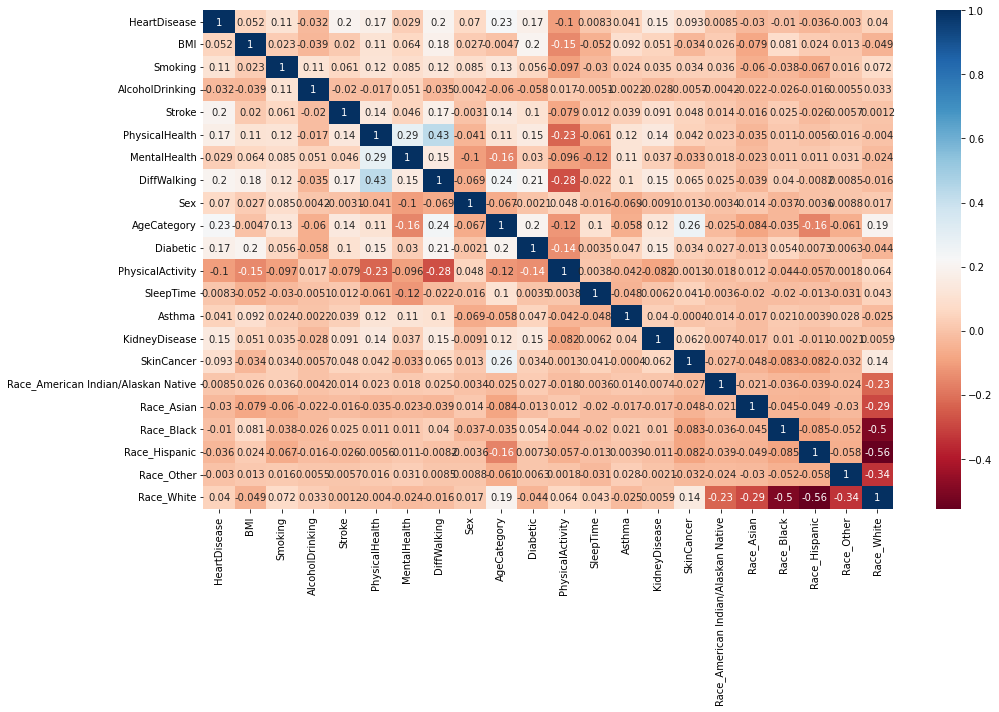

In [97]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches

# sns.heatmap(hd_pre_illness_df)
dataplot = sns.heatmap(df_binary.corr(), cmap="RdBu", annot=True,)
  
# displaying heatmap
plt.savefig ( "preexisting_correlation.svg" )
plt.show()

In [103]:
#check the total value of individual race
df.value_counts(('Race'))

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
dtype: int64

### Question: Number of man vs woman in raw dataset

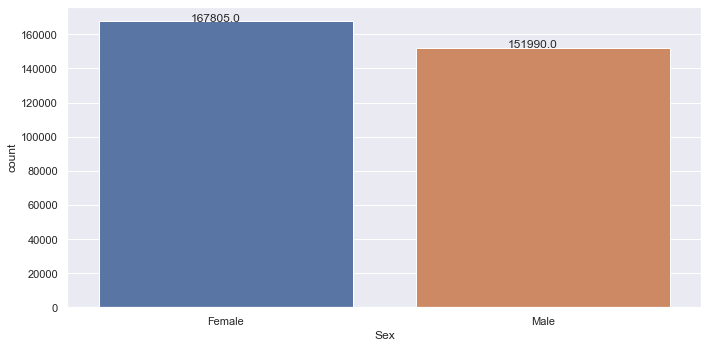

In [104]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="Sex", data = df)
# sns.catplot(x='Asthma',hue=None,data = hd_pre_illness_df, kind="count")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.29, p.get_height()+0.01)) #<-- To add value on top of graph
plt.savefig ( "ratio_men_women_raw_df.svg" )
plt.show()

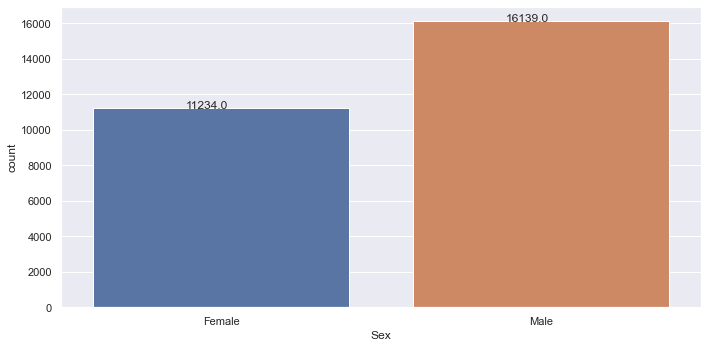

In [105]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

ax = sns.countplot(x="Sex", data = heart_disease_df)
# sns.catplot(x='Asthma',hue=None,data = hd_pre_illness_df, kind="count")

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.29, p.get_height()+0.01)) #<-- To add value on top of graph

plt.show()

# Smote

In [106]:
heart_disease_binary_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,28.87,1,0,0,6.0,0.0,1,0,12,Black,0,0,Fair,12.0,0,0,0,0,0,1,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,9,White,1,0,Poor,15.0,1,0,0,0,0,0,0,0,1
2,1,32.98,1,0,1,10.0,0.0,1,1,12,White,1,1,Poor,4.0,0,0,1,0,0,0,0,0,1
3,1,25.06,0,0,0,0.0,0.0,1,0,13,White,1,0,Good,7.0,0,0,1,0,0,0,0,0,1
4,1,30.23,1,0,0,6.0,2.0,1,0,12,White,1,1,Fair,8.0,0,1,0,0,0,0,0,0,1


In [154]:
# Selection of Data For Machine Learning Model
sel_ft_df = df_binary.loc[ : , ['HeartDisease', 'AgeCategory', 'Smoking', 'BMI']] # Removed "Sex" & "Race" after feature selection
# sel_ft_df_old = df_binary.loc[ : , ['HeartDisease', 'AgeCategory', 'Sex', 'Smoking', 'Race', 'BMI']]

# Divide the data into "attributes"(X) and "labels"(y)
X = sel_ft_df.drop('HeartDisease', axis=1)
y = sel_ft_df.HeartDisease

In [109]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=78)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (319795, 3)
Shape of X after SMOTE: (584844, 3)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: HeartDisease, dtype: float64

# ML Categorical

### Algorithm Model: Pycaret

In [110]:
# Setting up pycaret with selected features dataframe
from pycaret.classification import *
exp_clf101 = setup(data = sel_ft_df, target = 'HeartDisease', session_id=123, n_jobs=1, fix_imbalance = True)

In [111]:
# Please render last.. this takes a long time to process
# runnning pycaret to find the best algorithm for dataset
best_model = compare_models(fold = 5)
print(best_model)

In [112]:
print(best_model)

### Algorithm Model: Logistic Regression  | Recall Result: 76.94% | After FT SEL : 76.43%

In [113]:
# #Feature Scaling using StandardScaler

# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

Accuracy: 70.63%
Precision: 68.49%
Recall: 76.43%
F1 Score: 72.25%


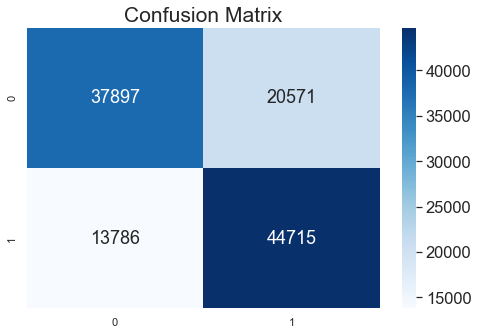

In [114]:
from sklearn.model_selection import train_test_split # import train test split

# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting Logistic Regression to the Training set
LRC = LogisticRegression(random_state=78)
LRC.fit(X_train, y_train)
y_pred = LRC.predict(X_test)


# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='Blues', fmt="g");

In [115]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_lg = pd.DataFrame(report).transpose()
df_report_lg

,precision,recall,f1-score,support
0,0.733259,0.648167,0.688092,58468.000000
1,0.684909,0.764346,0.722451,58501.000000
accuracy,0.706273,0.706273,0.706273,0.706273
macro avg,0.709084,0.706256,0.705271,116969.000000
weighted avg,0.709077,0.706273,0.705276,116969.000000


In [116]:
area_under_curve_LRC = roc_auc_score(y_test, LRC.predict(X_test))
print(area_under_curve_LRC)

0.7062562135271914


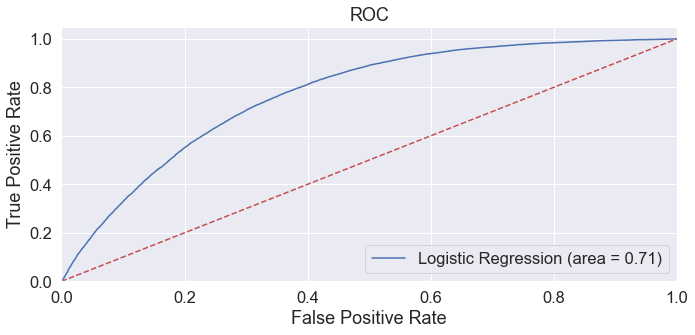

In [117]:
#Plot under chart curve
fpr, tpr, thresholds = roc_curve(y_test, LRC.predict_proba(X_test)[:,1])
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

area_under_curve = roc_auc_score(y_test, LRC.predict(X_test))

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve_LRC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

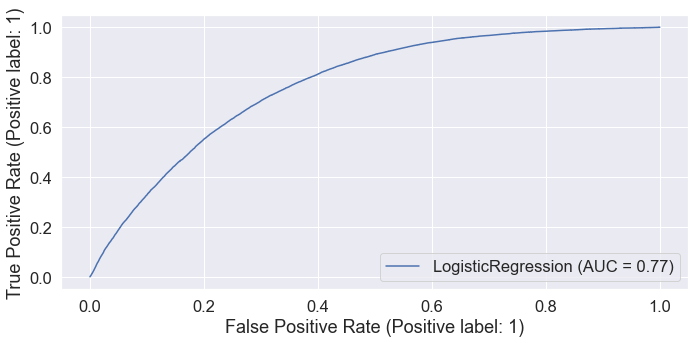

In [118]:
LRC_disp = plot_roc_curve(LRC, X_test, y_test)

##### Model evaluation - confusion matrix, AUC 

In [126]:
print(classification_report(y_test, y_pred))

# looking at class = 0: 
# Precision = TP/predicted positives = 49/49+11 = 0.96

# looking at class = 1: 
# Precision = TP/predicted positives = 0/0+0 = 0

              precision    recall  f1-score   support

           0       0.73      0.65      0.69     58468
           1       0.68      0.76      0.72     58501

    accuracy                           0.71    116969
   macro avg       0.71      0.71      0.71    116969
weighted avg       0.71      0.71      0.71    116969



In [127]:
# Create report into dataframe for presentation

report = classification_report(y_test, y_pred, output_dict=True)
df_report_lg = pd.DataFrame(report).transpose()
df_report_lg

,precision,recall,f1-score,support
0,0.733259,0.648167,0.688092,58468.000000
1,0.684909,0.764346,0.722451,58501.000000
accuracy,0.706273,0.706273,0.706273,0.706273
macro avg,0.709084,0.706256,0.705271,116969.000000
weighted avg,0.709077,0.706273,0.705276,116969.000000


### Algorithm Model: Decision Tree | Recall Result: 80.87% | After FT SEL : 81.42%

Accuracy: 79.94%
Precision: 79.09%
Recall: 81.42%
F1 Score: 80.24%


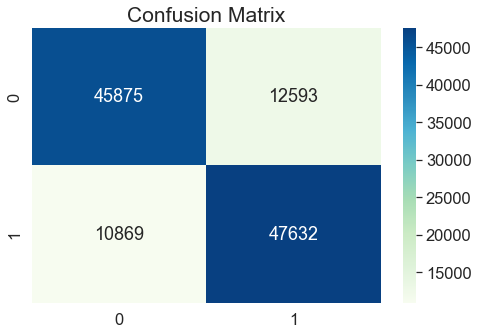

In [128]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting DecisionTree to the Training set
DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 100, random_state=78)
DTC.fit(X_train, y_train) #already fitted with SMOTE during train test split above
y_pred = DTC.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='GnBu', fmt="g");

In [129]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_dt = pd.DataFrame(report).transpose()
df_report_dt

,precision,recall,f1-score,support
0,0.808456,0.784617,0.796358,58468.000000
1,0.790901,0.814208,0.802385,58501.000000
accuracy,0.799417,0.799417,0.799417,0.799417
macro avg,0.799678,0.799413,0.799372,116969.000000
weighted avg,0.799676,0.799417,0.799373,116969.000000


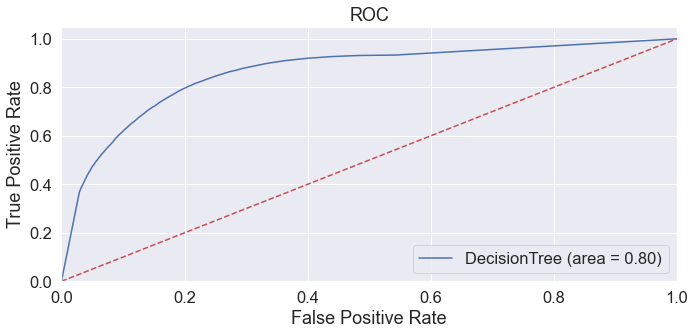

In [130]:
# Add variable for AUC DTC
area_under_curve_DTC = roc_auc_score(y_test, DTC.predict(X_test))

# ROC curve plot
fpr, tpr, thresholds = roc_curve(y_test, DTC.predict_proba(X_test)[:,1])  # second argument = positive class predictions
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


plt.plot(fpr, tpr, label='DecisionTree (area = %0.2f)' % area_under_curve_DTC)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

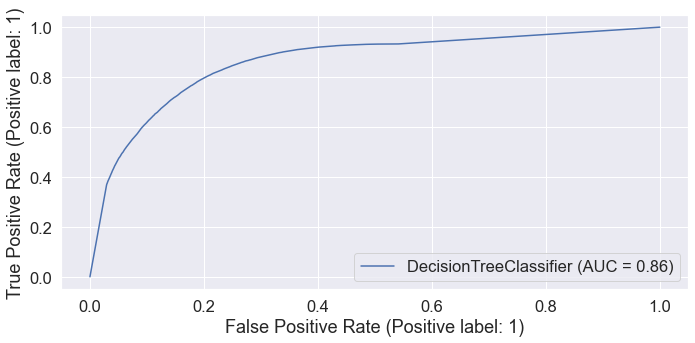

In [131]:
DTC_disp = plot_roc_curve(DTC, X_test, y_test)

### Algorithm Model: KNN Neighbour | Recall Result: 76.87% | After FT SEL : 73.86%

Accuracy: 74.25%
Precision: 74.45%
Recall: 73.86%
F1 Score: 74.15%


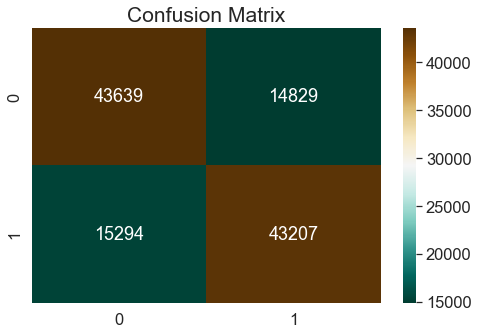

In [132]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)


# Fitting DecisionTree to the Training set
KNC = KNeighborsClassifier(n_neighbors=16, p = 2)
KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='BrBG_r', fmt="g");

In [133]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_knn = pd.DataFrame(report).transpose()
df_report_knn

,precision,recall,f1-score,support
0,0.740485,0.746374,0.743418,58468.00000
1,0.744486,0.738569,0.741516,58501.00000
accuracy,0.742470,0.742470,0.742470,0.74247
macro avg,0.742486,0.742471,0.742467,116969.00000
weighted avg,0.742486,0.742470,0.742466,116969.00000


In [134]:
# # Add variable for AUC KNC
# area_under_curve_KNC = roc_auc_score(y_test, KNC.predict(X_test))

# # ROC curve plot
# fpr, tpr, thresholds = roc_curve(y_test, KNC.predict_proba(X_test)[:,1])  # second argument = positive class predictions
# # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html


# plt.plot(fpr, tpr, label='K Neighbour (area = %0.2f)' % area_under_curve_KNC)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()

In [135]:
# KNC_disp = plot_roc_curve(KNC, X_test, y_test)

In [136]:
# # K-Fold cross validation

# from sklearn.model_selection import cross_val_score

# accuracies = cross_val_score(estimator=KNC, X=X_train, y=y_train, cv=10)

# accuracies.mean()

##### Find best K : Please render last. This takes a long time 

In [137]:
# error_rate = []

# # Will take some time
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     pred_i = knn.predict(X_test)
#     error_rate.append(np.mean(pred_i != y_test))

In [138]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

Conclusion: Will input K=16 and rerun the model

### Algorithm Model: SVM | Recall Result: 78.49% | After FT SEL : 78.23%

In [139]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Accuracy: 70.69%
Precision: 67.99%
Recall: 78.23%
F1 Score: 72.75%


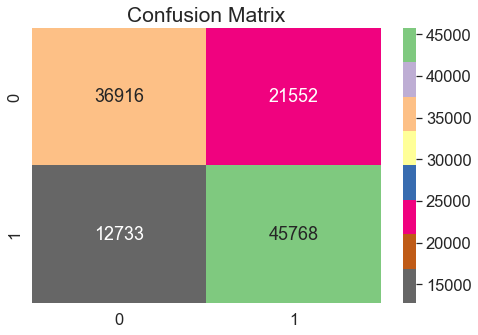

In [140]:
# SVM to the Training set #Approximately 2 mins of processing #After ft sel: 1min 48sec
svm_model = LinearSVC(random_state=0, tol=1e-5)
svm_model.fit(X_train, y_train.ravel()) 
y_pred = svm_model.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='Accent_r', fmt="g");


In [141]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_svm = pd.DataFrame(report).transpose()
df_report_svm

,precision,recall,f1-score,support
0,0.743540,0.631388,0.682890,58468.000000
1,0.679857,0.782346,0.727510,58501.000000
accuracy,0.706888,0.706888,0.706888,0.706888
macro avg,0.711699,0.706867,0.705200,116969.000000
weighted avg,0.711690,0.706888,0.705206,116969.000000


In [142]:
# # Add variable for ROC
# y_train_pred = svm_model.decision_function(X_train)    
# y_test_pred = svm_model.decision_function(X_test) 

# # ROC curve plot
# train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
# test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


# plt.grid()

# plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
# plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
# plt.plot([0,1],[0,1],'g--')
# plt.legend()
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
# plt.show()

In [143]:
# svc_disp = plot_roc_curve(svm_model, X_test, y_test)

### Algorithm Model: Random Forest Ensemble | Recall Result: 79.56% | After FT SEL : 80.77%

Accuracy: 72.00%
Precision: 68.68%
Recall: 80.89%
F1 Score: 74.29%


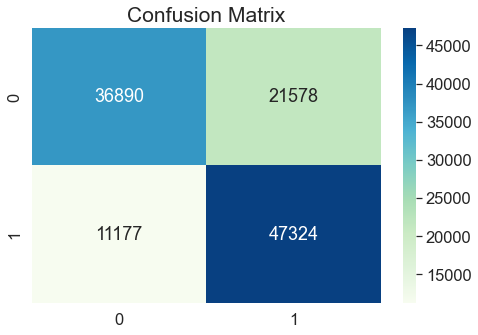

In [144]:
# 80% of the data to training set while 20% of the data to test set. Time taken to process: 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

rf_ens = RandomForestClassifier(n_estimators=500, max_depth=10, 
                               oob_score=True, n_jobs=-1)
rf_ens.fit(X_train, y_train)
y_pred = rf_ens.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='GnBu', fmt="g");


In [145]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_randfr = pd.DataFrame(report).transpose()
df_report_randfr

,precision,recall,f1-score,support
0,0.767470,0.630943,0.692542,58468.000000
1,0.686831,0.808943,0.742902,58501.000000
accuracy,0.719969,0.719969,0.719969,0.719969
macro avg,0.727150,0.719943,0.717722,116969.000000
weighted avg,0.727139,0.719969,0.717730,116969.000000


In [146]:
# rfc_disp = plot_roc_curve(rf_ens, X_test, y_test)

### Algorithm Model: XGBoost| Recall Result: 81.84% | After FT SEL : 81.48%

Accuracy: 73.84%
Precision: 70.69%
Recall: 81.48%
F1 Score: 75.70%


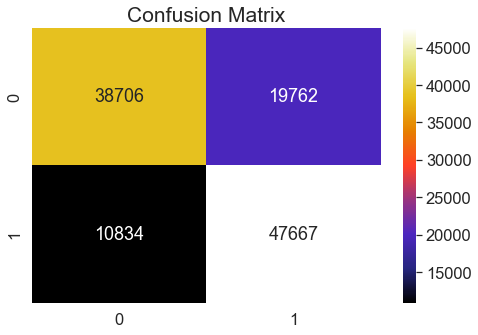

In [147]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting XGBoost to the Training set
XGBC = xgb.XGBClassifier(random_state = 2)
XGBC.fit(X_train, y_train) #already fitted with SMOTE during train test split above
y_pred = XGBC.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='CMRmap', fmt="g");

In [148]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report_xgb = pd.DataFrame(report).transpose()
df_report_xgb

,precision,recall,f1-score,support
0,0.781308,0.662003,0.716725,58468.000000
1,0.706921,0.814807,0.757040,58501.000000
accuracy,0.738426,0.738426,0.738426,0.738426
macro avg,0.744115,0.738405,0.736882,116969.000000
weighted avg,0.744104,0.738426,0.736888,116969.000000


In [149]:
XGBC

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2, ...)

# Features Selection

### Forward Selection Method (SFS)

In [155]:
heart_disease_binary_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,1,28.87,1,0,0,6.0,0.0,1,0,12,2,0,0,Fair,12.0,0,0,0,0,0,1,0,0,0
1,1,34.30,1,0,0,30.0,0.0,1,1,9,1,1,0,Poor,15.0,1,0,0,0,0,0,0,0,1
2,1,32.98,1,0,1,10.0,0.0,1,1,12,1,1,1,Poor,4.0,0,0,1,0,0,0,0,0,1
3,1,25.06,0,0,0,0.0,0.0,1,0,13,1,1,0,Good,7.0,0,0,1,0,0,0,0,0,1
4,1,30.23,1,0,0,6.0,2.0,1,0,12,1,1,1,Fair,8.0,0,1,0,0,0,0,0,0,1


In [156]:
sel_ft_df = df_binary.loc[ : , ['HeartDisease', 'AgeCategory', 'Sex', 'Smoking','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White', 'BMI']]

# Divide the data into "attributes"(X) and "labels"(y)
features = sel_ft_df.drop('HeartDisease', axis=1)
target= sel_ft_df.HeartDisease

In [163]:
# 80% of the data to training set while 20% of the data to test set
X_train , X_test , y_train , y_test = train_test_split(features , target, random_state = 111) # Dont need to use smote data to find feature selection

# Fitting XGBoost to the Training set
XGBC_FT = xgb.XGBClassifier(random_state = 2)
XGBC.fit(X_train, y_train)
result = XGBC.predict(X_test)

In [164]:
sfs = SFS(XGBC_FT, 
          k_features=5, 
          forward=True, 
          scoring='recall',   # default is r2 (regression) and accuracy (classification)
          cv=3)

In [165]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) # this is to find the type of scorer that you chosen. In this case a 'recall'

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [166]:
sfs = sfs.fit(X_train, y_train) # run time 10 mins

In [167]:
sfs.k_feature_names_

('AgeCategory', 'Sex', 'Smoking', 'Race_Black', 'BMI')

In [168]:
print('\nSelected feature indices:', sfs.k_feature_idx_)
print('CV Score:', sfs.k_score_)


Selected feature indices: (0, 1, 2, 5, 9)
CV Score: 0.001706544083054779


In [169]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.0, 0.0, 0.0]",0.0,"(AgeCategory,)",0.0,0.0,0.0
2,"(0, 9)","[0.0007314218841427735, 0.00043878894251864854...",0.000878,"(AgeCategory, BMI)",0.000969,0.000431,0.000305
3,"(0, 2, 9)","[0.0023405500292568754, 0.000292525961679099, ...",0.001219,"(AgeCategory, Smoking, BMI)",0.001907,0.000847,0.000599
4,"(0, 1, 2, 9)","[0.0017554125219426564, 0.0016088927892350445,...",0.001755,"(AgeCategory, Sex, Smoking, BMI)",0.000269,0.00012,0.000085
5,"(0, 1, 2, 5, 9)","[0.0017554125219426564, 0.002193944712593243, ...",0.001707,"(AgeCategory, Sex, Smoking, Race_Black, BMI)",0.000944,0.000419,0.000297


### Univariate Selection

In [170]:
# source from: https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

sel_ft_df = df_binary.loc[ : , ['HeartDisease', 'AgeCategory', 'Sex', 'Smoking','Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White', 'BMI']] # Dont need smote for feature selection

# Divide the data into "attributes"(X) and "labels"(y)
X = sel_ft_df.drop('HeartDisease', axis=1)
y = sel_ft_df.HeartDisease

In [176]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns


print(featureScores.nlargest(5,'Score'))  # print 5 best features

           Specs         Score
0    AgeCategory  29467.971972
2        Smoking   2181.953023
9            BMI   1224.020726
1            Sex    823.195671
6  Race_Hispanic    382.323275


In [177]:
df_ft_select = pd.DataFrame(featureScores)
df_ft_select

,Specs,Score
0,AgeCategory,29467.971972
1,Sex,823.195671
2,Smoking,2181.953023
3,Race_American Indian/Alaskan Native,22.981832
4,Race_Asian,285.477970
5,Race_Black,30.621518
6,Race_Hispanic,382.323275
7,Race_Other,2.851666
8,Race_White,120.058624
9,BMI,1224.020726


In [181]:
ft_slct_score = featureScores.nlargest(13,'Score')
ft_slct_score

,Specs,Score
0,AgeCategory,29467.971972
2,Smoking,2181.953023
9,BMI,1224.020726
1,Sex,823.195671
6,Race_Hispanic,382.323275
4,Race_Asian,285.477970
8,Race_White,120.058624
5,Race_Black,30.621518
3,Race_American Indian/Alaskan Native,22.981832
7,Race_Other,2.851666


<AxesSubplot:xlabel='Specs', ylabel='Score'>

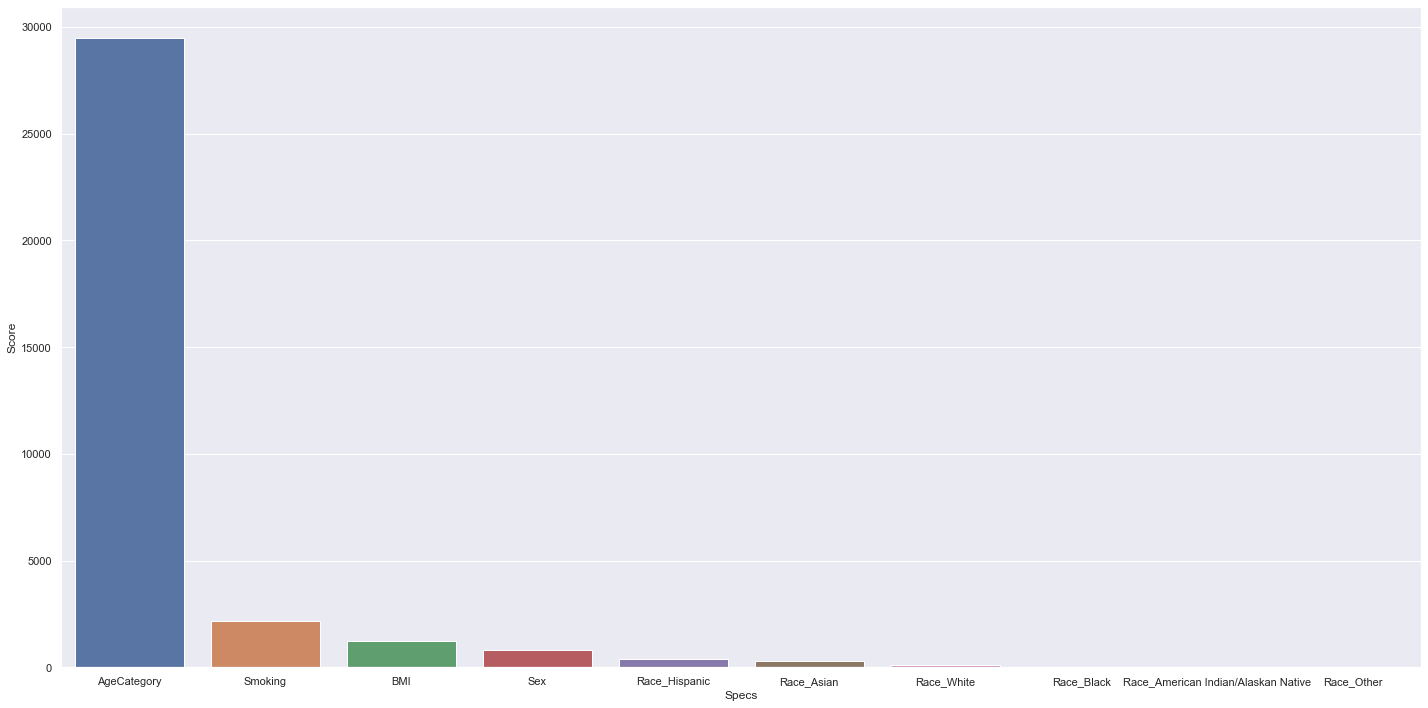

In [182]:
sns.set ( rc = { 'figure.figsize' : ( 20 , 10 ) } )

# compare between the types of accomodation in the most profitable are
sns.barplot( x = 'Specs', y = 'Score', data = ft_slct_score , hue = None, ci = None) 

#### Conclusion: Sex and individual race doesnt seem to be of importance. Will remove model and try running again

# Hyper-parameter

### Grid Search CV

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_sm, y_sm,random_state = 1)

# Fit a XGBClassifier to the train set
xgb_grid = xgb.XGBClassifier(random_state = 2)

model = xgb_grid.fit(X_train, y_train)
result = xgb_grid.predict(X_test)

print(metrics.classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72     73085
           1       0.71      0.82      0.76     73126

    accuracy                           0.74    146211
   macro avg       0.75      0.74      0.74    146211
weighted avg       0.75      0.74      0.74    146211



In [ ]:
y_sm.value_counts() # target

In [ ]:
x = 292422/292422

param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.5, 1],
    'reg_lambda': [10.0, 20, 100],
    'scale_pos_weight': [x]
}

In [ ]:
optimal_params = GridSearchCV(
                    estimator = xgb_grid,  
                    param_grid = param_grid,
                    scoring = 'recall', ## see https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                    verbose = 0, 
                    cv = 3
)

optimal_params.fit(X_train, 
                   y_train, 
                   early_stopping_rounds=10,   
                   eval_set=[(X_test, y_test)],   # evaluate auc upon the test set
                   verbose=False)

print(optimal_params.best_params_)

In [ ]:
result2 = optimal_params.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, result2))

### Random Search CV

In [194]:
XGBC

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2, ...)

In [200]:
>>> from sklearn.model_selection import RandomizedSearchCV

# Fit a XGBClassifier to the train set
xgb_grid = xgb.XGBClassifier(random_state = 2)

params = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth' : [3, 4, 5, 6, 8, 10, 12, 15],
            'min_child_weight' : [1, 3, 5, 7 ],
            'gamma': [0.0, 0.1, 0.2 , 0.3, 0.4 ],
            'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}


rs_model=RandomizedSearchCV(xgb_grid,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

rs_model.fit(X_sm, y_sm)

rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.777 total time=  45.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.799 total time=  45.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.806 total time=  46.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=7;, score=0.801 total time=  46.6s
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.763 total time=  20.8s
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.772 total time=  20.4s
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.772 total time=  20.5s
[CV 5/5] END colsample_bytree=

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=2, ...)

# Apply Hyper Parameter result

### Apply Grid Search CV To: XGBOOST | Recall Result: 81.84% | After FT SEL : 81.48% | After GridSearch CV: 82.91%

Accuracy: 77.45%
Precision: 74.76%
Recall: 82.91%
F1 Score: 78.62%


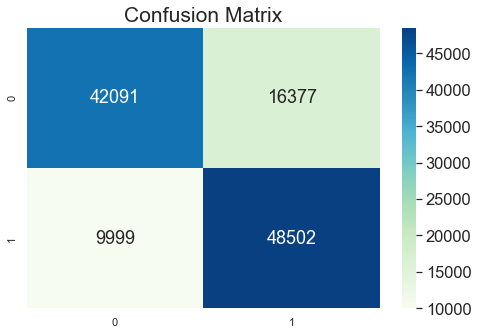

In [201]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting new parameters fro grid search to the Training set
XGBC = xgb.XGBClassifier(learning_rate=1, max_depth=7, reg_lambda=10.0, scale_pos_weight=1.0)

XGBC.fit(X_train, y_train) # already fitted with SMOTE during train test split above
y_pred = XGBC.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='GnBu', fmt="g");

### Apply Random Search CV To: XGBOOST | Recall Result: 81.84% | After FT SEL : 81.48% | After RandomSearch CV: 81.17%

Accuracy: 75.55%
Precision: 72.98%
Recall: 81.17%
F1 Score: 76.86%


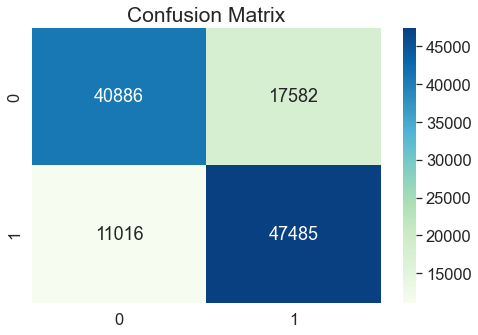

In [207]:
# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting new parameters fro grid search to the Training set
XGBC_randomcv = xgb.XGBClassifier ## Applying Grid Search CV To Selected Algorithm Model: XGBOOST


# 80% of the data to training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 111)

# Fitting new parameters fro grid search to the Training set
XGBC = xgb.XGBClassifier(colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=1)

XGBC.fit(X_train, y_train) # already fitted with SMOTE during train test split above
y_pred = XGBC.predict(X_test)

# Evaluate
cm = confusion_matrix(y_test, y_pred)

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print('Precision: {:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall: {:.2f}%'.format(recall_score(y_test, y_pred)*100))
print('F1 Score: {:.2f}%'.format(f1_score(y_test, y_pred)*100))

#plot confusion metrix
plt.figure(figsize=(7, 5))
plt.title('Confusion Matrix', size=21)
sns.set(font_scale=1.5)

sns.heatmap(cm, annot=True, cmap='GnBu', fmt="g");
